In [5]:
#CustomerChurn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

In [14]:
df = pd.read_csv("/content/CustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
obj_cols = df_churn.select_dtypes(include=["object"]).columns.tolist()

encoding_maps = {}
for c in obj_cols:
    df_churn[c] = df_churn[c].astype("category")
    codes = df_churn[c].cat.codes
    mapping = dict(enumerate(df_churn[c].cat.categories))
    encoding_maps[c] = mapping
    df_churn[c] = codes

if "Churn" in encoding_maps:
    print("Churn mapping (code -> original):", {k: v for k, v in encoding_maps["Churn"].items()})

Churn mapping (code -> original): {0: 'No', 1: 'Yes'}


In [8]:
target_col = "Churn"
features_df = df_churn.drop(columns=target_col)
target_ser = df_churn[target_col]


In [9]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    features_df, target_ser, test_size=0.30, random_state=42, stratify=target_ser
)

In [10]:
clf_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_tree.fit(X_train_split, y_train_split)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [11]:
y_pred_split = clf_tree.predict(X_test_split)

acc_val = accuracy_score(y_test_split, y_pred_split)
print(f"\nModel Accuracy: {acc_val:.4f} ({acc_val*100:.2f}%)\n")

print("Classification Report:")
print(classification_report(y_test_split, y_pred_split, digits=4))


Model Accuracy: 0.7861 (78.61%)

Classification Report:
              precision    recall  f1-score   support

           0     0.8463    0.8660    0.8561      1552
           1     0.6038    0.5651    0.5838       561

    accuracy                         0.7861      2113
   macro avg     0.7251    0.7155    0.7199      2113
weighted avg     0.7820    0.7861    0.7838      2113



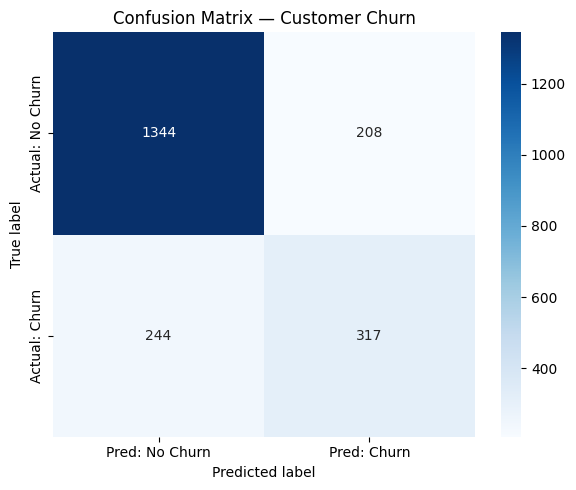

In [12]:
ConfusionMatrix = confusion_matrix(y_test_split, y_pred_split)

plt.figure(figsize=(6,5))
sns.heatmap(
    ConfusionMatrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred: No Churn", "Pred: Churn"],
    yticklabels=["Actual: No Churn", "Actual: Churn"]
)
plt.title("Confusion Matrix — Customer Churn")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

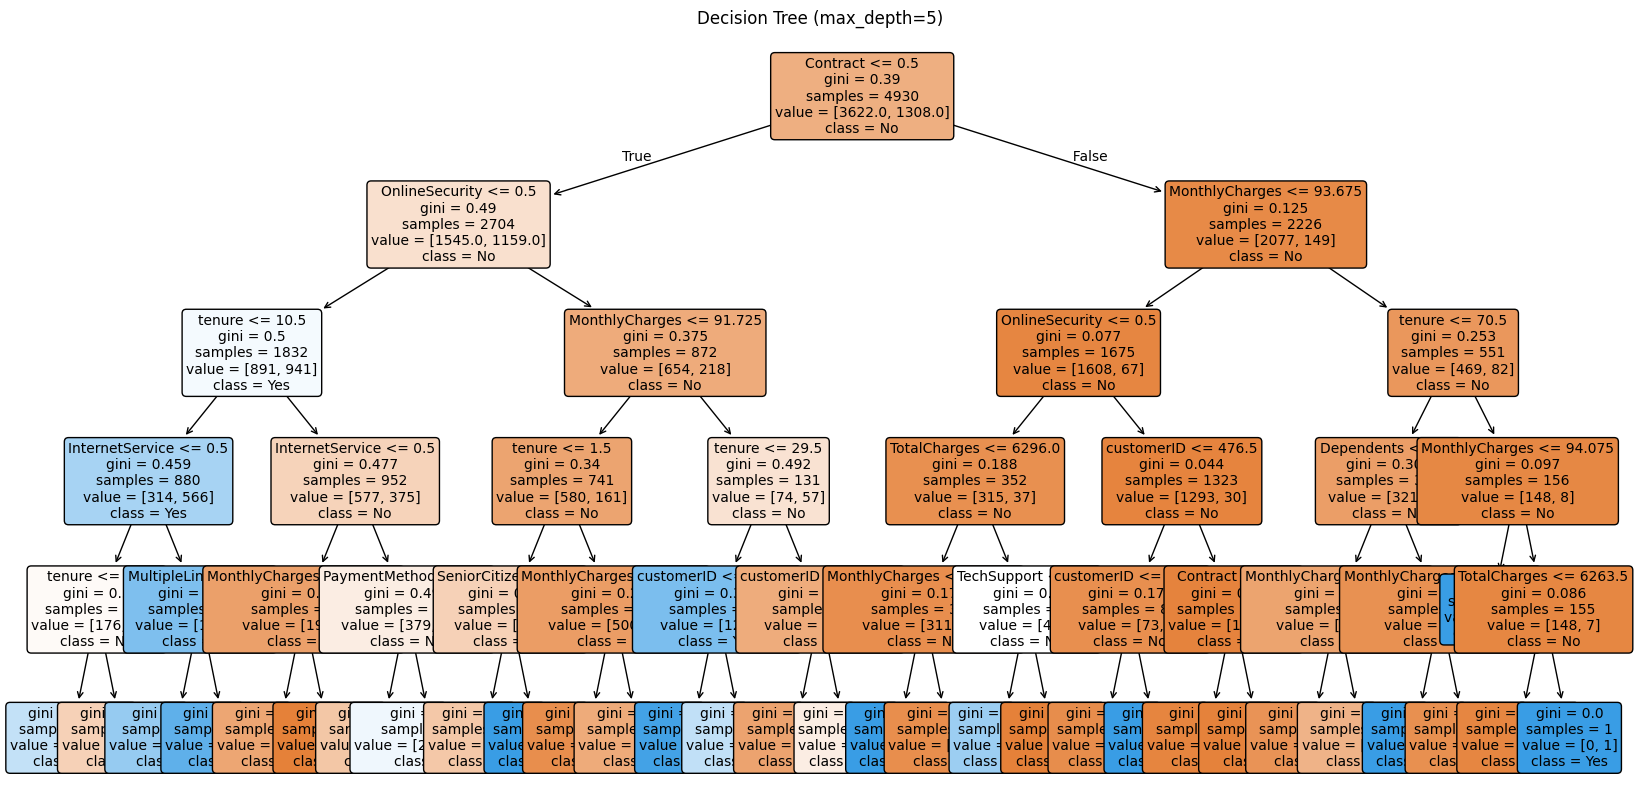

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(
    clf_tree,
    feature_names=features_df.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (max_depth=5)")
plt.show()